# REST API
- Representational State Transfer
- Client와 Server가 통신하기 위한 URL 구조에 대한 정의 및 디자인

## 1\. Naver API
- 통합검색어 트렌드 API
    - https://datalab.naver.com/
    - https://datalab.naver.com/keyword/trendSearch.naver

In [1]:
import pandas as pd
import requests
import json

### 2-1. Request Token 얻기
- `https://developers.naver.com`
- 1. Request Token 얻기 : 애플리케이션등록 -> app_key 획득
- 2. app_key를 이용해서 데이터 가져오기

In [22]:
CLIENT_ID = 'sjp2Qrv3ZINLuq7tcnPv'
CLIENT_SECRET = 'I9xFQShbXF'

### 2-2. 통합검색어 트렌드 API
- 서비스 : `https://datalab.naver.com/keyword/trendSearch.naver`
- 내 애플리케이션 > kt 애플리케이션 > API 설정 > 데이터랩(검색어 트렌드) 추가
- 사용법 : `https://developers.naver.com/docs/serviceapi/datalab/search/search.md#통합-검색어-트렌드`

In [23]:
# 1. url
url = 'https://openapi.naver.com/v1/datalab/search'

In [34]:
# 2. request > response(json)
params = {
    'startDate' : '2018-01-01',
    'endDate' : '2023-12-31',
    'timeUnit' : 'month',
    'keywordGroups' : [
        {'groupName' : '트위터', 'keywords' : ['트위터', '트윗']},
        {'groupName' : '페이스북', 'keywords' : ['페이스북', '페북']},
        {'groupName' : '인스타그램', 'keywords' : ['인스타그램', '인스타']},
    ]
}
headers = {
     'Content-Type' : 'application/json',
     'X-Naver-Client-Id' : CLIENT_ID,
     'X-Naver-Client-Secret' : CLIENT_SECRET,
}
response = requests.post(url, data=json.dumps(params), headers=headers)
response

<Response [200]>

In [35]:
json.dumps(params)

'{"startDate": "2018-01-01", "endDate": "2023-12-31", "timeUnit": "month", "keywordGroups": [{"groupName": "\\ud2b8\\uc704\\ud130", "keywords": ["\\ud2b8\\uc704\\ud130", "\\ud2b8\\uc717"]}, {"groupName": "\\ud398\\uc774\\uc2a4\\ubd81", "keywords": ["\\ud398\\uc774\\uc2a4\\ubd81", "\\ud398\\ubd81"]}, {"groupName": "\\uc778\\uc2a4\\ud0c0\\uadf8\\ub7a8", "keywords": ["\\uc778\\uc2a4\\ud0c0\\uadf8\\ub7a8", "\\uc778\\uc2a4\\ud0c0"]}]}'

In [36]:
# 3. parsing
data = response.json()['results']
#data

In [38]:
# 4. preprocessing
dfs = []
for row in data:
    df = pd.DataFrame(row['data'])
    df['title'] = row['title']
    dfs.append(df)

In [40]:
#len(dfs), dfs[2]
result = pd.concat(dfs, ignore_index=True)

,period,ratio,title
0,2018-01-01,14.59502,트위터
1,2018-02-01,13.02380,트위터
2,2018-03-01,12.97953,트위터
3,2018-04-01,12.82991,트위터
4,2018-05-01,13.05391,트위터
...,...,...,...
211,2023-08-01,21.96847,인스타그램
212,2023-09-01,21.10131,인스타그램
213,2023-10-01,22.15029,인스타그램
214,2023-11-01,23.18797,인스타그램


In [45]:
pivot_df = result.pivot(index='period', columns='title', values='ratio')
pivot_df.columns = ['instagram', 'twitter', 'facebook']
pivot_df.tail()

,instagram,twitter,facebook
period,,,
2023-08-01,21.96847,26.76331,11.52409
2023-09-01,21.10131,23.00812,10.46711
2023-10-01,22.15029,24.13886,10.44804
2023-11-01,23.18797,22.86116,9.97093
2023-12-01,21.84237,23.01963,10.12856


<Axes: xlabel='period'>

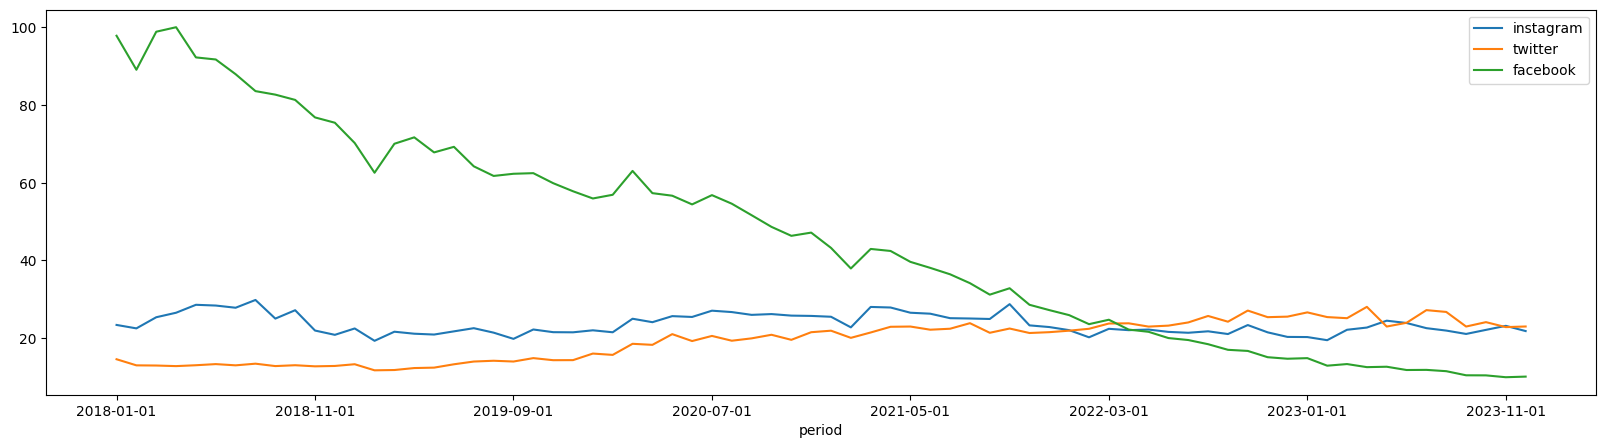

In [47]:
pivot_df.plot(figsize=(20, 5))